In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from master import *
from models import *
from torchsummary import summary

In [4]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
DATASET='small'
ROOT_DIR = f'/beegfs/bva212/fma_{DATASET}_cqt/'
PATH_FILE = 'checksums'
BATCH_SIZE = 32
VAL_SPLIT = 0.2
TRANSFORM_PROB  = 0.5
SR = 22050
MODEL_SAVE_PATH = '/beegfs/sc6957/capstone/models/'
MODE = 'jigsaw'
MODEL_ARCHITECTURE = 'snet2'  #['l3net','snet',snet2',anet']
SEPARABLE = False
REDUCE_TWO_CLASS = True #Applies to jigsaw (6-class to 2-class)
NUM_SECONDS=10

In [5]:
start = time.time()
MODEL,MODEL_NAME = load_model(DEVICE, MODEL_ARCHITECTURE, MODE, SEPARABLE)
master = Master(DEVICE, ROOT_DIR, PATH_FILE, SR, BATCH_SIZE, VAL_SPLIT, TRANSFORM_PROB, REDUCE_TWO_CLASS, MODE, MODEL, NUM_SECONDS)
print(f'time for instantiating audio net object - {time.time() - start}')

Instantiating Model snet2_jigsaw
Number of Seconds: 10
MODE: jigsaw
Getting Train & Validation Datasets
Excluding these 3 files - ['098/098567.mp3_cqt.npy', '098/098565.mp3_cqt.npy', '098/098569.mp3_cqt.npy']
There are a total of 7836 music files in the root directory
TRANSFORMING DATA!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Training samples: 6268 	 # Validation samples: 1567
	 --Done
Creating Train & Validation Dataloaders
Length of Train dataloader: 196 	 Validation dataloader: 49
	 --Done
	 --Done
Init actions done
time for instantiating audio net object - 12.102487564086914


In [6]:
# start = time.time()
# batch = next(iter(master.dataloaders['train']))
# print(f'time for fetching one batch - {time.time() - start}')

In [7]:
master.model

snet2_jigsaw(
  (conv_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(2, 2), padding=(5, 5))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(5, 5))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(5, 5))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): AvgPool2d(kernel_size=3, stride=3, padding=0)
    (10): Conv2d(64, 128, kernel_size=(4, 4), stride=(1, 1), padding=(4, 4))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1), padding=(4, 4))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, 

In [8]:
master.input_size

torch.Size([3, 84, 135])

In [9]:
summary(master.model,input_size=master.input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 45, 71]             416
       BatchNorm2d-2           [-1, 16, 45, 71]              32
              ReLU-3           [-1, 16, 45, 71]               0
            Conv2d-4           [-1, 32, 26, 39]          12,832
       BatchNorm2d-5           [-1, 32, 26, 39]              64
              ReLU-6           [-1, 32, 26, 39]               0
            Conv2d-7           [-1, 64, 32, 45]          51,264
       BatchNorm2d-8           [-1, 64, 32, 45]             128
              ReLU-9           [-1, 64, 32, 45]               0
        AvgPool2d-10           [-1, 64, 10, 15]               0
           Conv2d-11          [-1, 128, 15, 20]         131,200
      BatchNorm2d-12          [-1, 128, 15, 20]             256
             ReLU-13          [-1, 128, 15, 20]               0
           Conv2d-14          [-1, 256,

In [10]:
MODEL_SAVE_PATH = MODEL_SAVE_PATH+MODEL_NAME+f'_{DATASET}_'

Saving model at /beegfs/sc6957/capstone/models/snet2_jigsaw_small_
Instantiating Optimzer, Loss Criterion, Scheduler
	 --Done
Training started
Epoch 1/25
----------
Phase: train   Iteration 196/196
train Loss: 0.6191 Acc: 0.6390
Phase: valid   Iteration 49/49
valid Loss: 0.6088 Acc: 0.6548

Successfully checkpointed model after 0 epochs
Epoch 6/25id   Iteration 49/4996
----------
Phase: train   Iteration 196/196
train Loss: 0.6186 Acc: 0.6399
Phase: valid   Iteration 49/49
valid Loss: 0.6161 Acc: 0.6465

Successfully checkpointed model after 5 epochs
Epoch 11/25d   Iteration 49/4996
----------
Phase: train   Iteration 196/196
train Loss: 0.6094 Acc: 0.6477
Phase: valid   Iteration 49/49
valid Loss: 0.6121 Acc: 0.6465

Successfully checkpointed model after 10 epochs
Epoch 16/25d   Iteration 49/4996
----------
Phase: train   Iteration 196/196
train Loss: 0.6113 Acc: 0.6471
Phase: valid   Iteration 49/49
valid Loss: 0.5912 Acc: 0.6796

Successfully checkpointed model after 15 epochs
Epoch

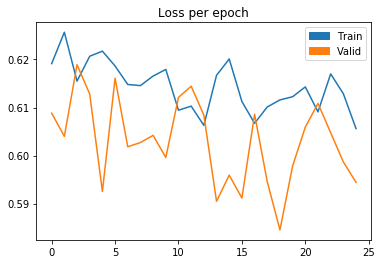

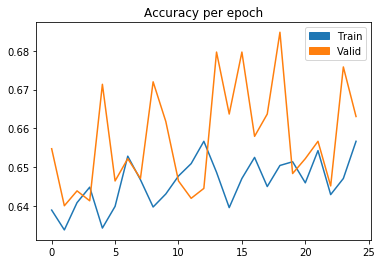

In [12]:
master.train(num_epochs= 25, learning_rate=1e-5, print_every=5, verbose=True, save=True, checkpoint_every=5, model_save_path = MODEL_SAVE_PATH)